In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
from pathlib import Path
import os

In [2]:
# Path to root directory
path = Path('Day-Night-Classifier/day_night_dataset/')

In [3]:
train_day = list((path/'train/day').iterdir())
train_night = list((path/'train/night').iterdir())
valid_day = list((path/'val/day').iterdir())
valid_night = list((path/'val/night').iterdir())

In [4]:
img_day = cv2.imread(str(train_day[0]))
img_night = cv2.imread(str(train_night[0]))

In [5]:
print(img_day.shape)
print(img_night.shape)

(3648, 5472, 3)
(750, 500, 3)


In [6]:
img_day = cv2.resize(img_day,(500,500))
img_night = cv2.resize(img_night,(500,500))

Text(0.5, 1.0, 'Night_BGR')

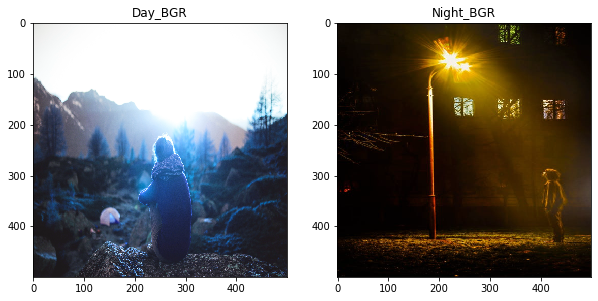

In [7]:
fig,ax = plt.subplots(1,2,figsize = (10,15))
ax[0].imshow(img_day)
ax[0].set_title('Day_BGR')  
ax[1].imshow(img_night)
ax[1].set_title('Night_BGR') 

In [8]:
#convert BGR to RGB
day_rgb = cv2.cvtColor(img_day,cv2.COLOR_BGR2RGB)
night_rgb = cv2.cvtColor(img_night,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Night_RGB')

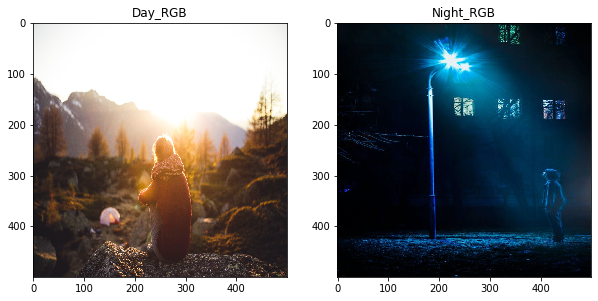

In [9]:
fig,ax = plt.subplots(1,2,figsize = (10,15))
ax[0].imshow(day_rgb)
ax[0].set_title('Day_RGB')  
ax[1].imshow(night_rgb)
ax[1].set_title('Night_RGB') 

In [10]:
day_hsv = cv2.cvtColor(img_day,cv2.COLOR_BGR2HSV)
night_hsv = cv2.cvtColor(img_night,cv2.COLOR_BGR2HSV)

Text(0.5, 1.0, 'night_hsv')

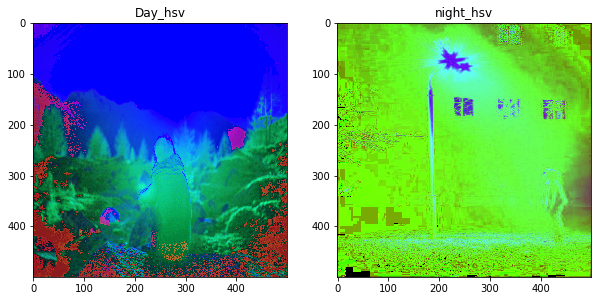

In [11]:
fig,ax = plt.subplots(1,2,figsize = (10,15))
ax[0].imshow(day_hsv)
ax[0].set_title('Day_hsv')
ax[1].imshow(night_hsv)
ax[1].set_title('night_hsv')

In [12]:
dh,ds,dv = cv2.split(day_hsv)
nh,ns,nv = cv2.split(night_hsv)

Text(0.5, 1.0, 'Value')

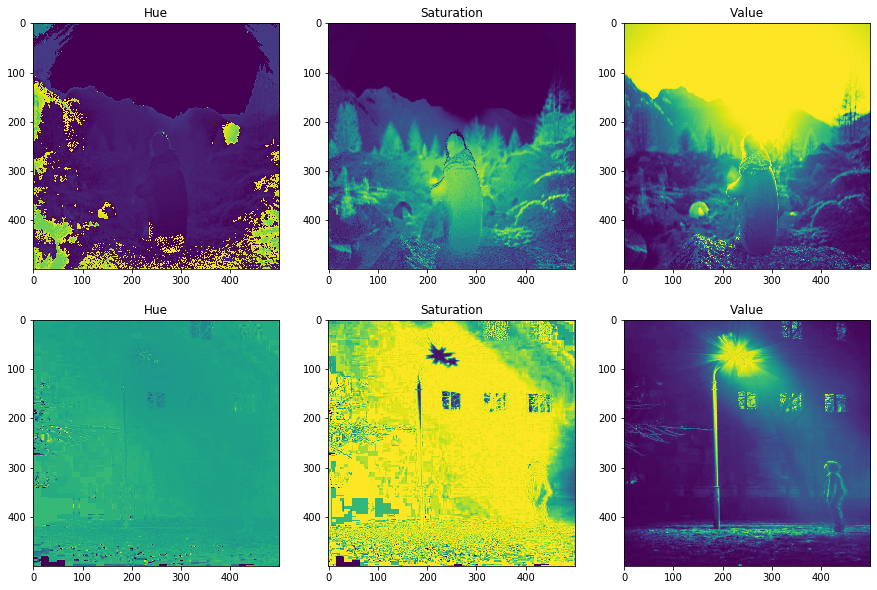

In [13]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
ax[0][0].imshow(dh)
ax[0][0].set_title('Hue')
ax[0][1].imshow(ds)
ax[0][1].set_title('Saturation')
ax[0][2].imshow(dv)
ax[0][2].set_title('Value')

ax[1][0].imshow(nh)
ax[1][0].set_title('Hue')
ax[1][1].imshow(ns)
ax[1][1].set_title('Saturation')
ax[1][2].imshow(nv)
ax[1][2].set_title('Value')

In [14]:
day_brightness = []
night_brightness = []

In [15]:
for day_image in train_day:
    img = cv2.imread(str(day_image))
    img = cv2.resize(img,(500,500))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    avg_brightness = np.mean(img[:, :, 2])
    day_brightness.append(avg_brightness)

In [16]:
for night_image in train_night:
  img = cv2.imread(str(night_image)) # reading img 
  img = cv2.resize(img, (500, 500)) # resizing image
  img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # converting to hsv
  avg_brightness = np.mean(img[:, :, 2]) # calculating average value of Value channel from HSV image
  night_brightness.append(avg_brightness) # appending to array

In [17]:
day_avg_brightness = np.mean(day_brightness)
night_avg_brightness = np.mean(night_brightness)
print(day_avg_brightness,night_avg_brightness)

137.8649363786575 75.74458161752989


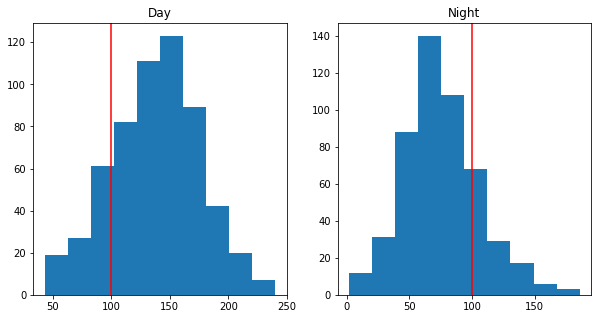

In [18]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(day_brightness)
ax[0].set_title('Day')
ax[0].axvline(100, color='red')
ax[1].hist(night_brightness)
ax[1].set_title('Night')
ax[1].axvline(100, color='red')

In [19]:
def validate (thresh, Day_dataset, Night_dataset, out_folder_day, out_folder_night):
    corrects = 0
    total = len(Day_dataset) + len(Night_dataset)

    for valid_day_img in Day_dataset:
        img = cv2.imread(str(valid_day_img))
        img = cv2.resize(img,(500,500))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        avg_brightness = np.mean(img[:, :,2])
        if avg_brightness > thresh:
            #cv2.imwrite('Validate_Day_Images/Day_'+valid_day_img,img)
            #cv2.imwrite('Validate_Day_Images/Day'+str(valid_day_img),img)
            cv2.putText(img,f'Day brightness:{avg_brightness}',(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            cv2.imwrite(f'{out_folder_day}/Day_{valid_day_img.name}',img)
            corrects += 1
            
    for valid_night_img in Night_dataset:
        img = cv2.imread(str(valid_night_img))
        img = cv2.resize(img,(500,500))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        avg_brightness = np.mean(img[:, :,2])
        if avg_brightness < thresh:
            cv2.putText(img,f'Night brightness:{avg_brightness}',(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            cv2.imwrite(f'{out_folder_night}/Day_{valid_night_img.name}',img)
            #cv2.imwrite('Validate_night_Images/Night'+str(valid_night_img),img)
            corrects += 1
            #cv2.imwrite(f'{output_folder1}/valid_night{img}',img)
            
    accuracy = (corrects * 1.0)/total
    return accuracy

In [20]:
validate(100,valid_day,valid_night,'Validate_Day_Images','Validate_Night_Images')

0.885

In [5]:
def validate(thresh = 100):
    corrects = 0
    total = len(valid_day) + len(valid_night)
    for valid_day_img in valid_day:
        img = cv2.imread(str(valid_day_img))
        img = cv2.resize(img,(500,500))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        avg_brightness = np.mean(img[:, :,2])
        if avg_brightness > thresh:
            #cv2.imwrite('Validate_Day_Images/Day_'+valid_day_img,img)
            #cv2.imwrite('Validate_Day_Images/Day'+str(valid_day_img),img)
            cv2.putText(img,f'Day brightness:{avg_brightness}',(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            cv2.imwrite(f'Validate_Day_Images/Day_{valid_day_img.name}',img)
            corrects += 1
            
    for valid_night_img in valid_night:
        img = cv2.imread(str(valid_night_img))
        img = cv2.resize(img,(500,500))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        avg_brightness = np.mean(img[:, :,2])
        if avg_brightness < thresh:
            cv2.putText(img,f'Night brightness:{avg_brightness}',(30,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            cv2.imwrite(f'Validate_Night_Images/Day_{valid_night_img.name}',img)
            #cv2.imwrite('Validate_night_Images/Night'+str(valid_night_img),img)
            corrects += 1
            #cv2.imwrite(f'{output_folder1}/valid_night{img}',img)
            
    accuracy = (corrects * 1.0)/total
    return accuracy

In [36]:
#output_folder0 = 'Validate_Day_Images'
#output_folder1 = 'Validate_Night_Images'
# os.mkdir('Validate_Day_Images')
# os.mkdir('Validate_Night_Images')
validate(thresh=100)

0.885